In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import pandas as pd
import numpy as np
import os
from os.path import join, isdir, dirname, basename, exists
from os import mkdir

import nibabel as nib

from scipy.stats import t as tdist
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context="paper",style="white",font_scale=1.5)

In [3]:
yoked = pd.read_excel('../../onsetdir/CON_yoked_table.xlsx')
yoked = yoked.query('use == 1').reset_index()

In [4]:
shock_beta_path = '../../dataset/results_ShockUncensored/{subj}/{group}lable/splitted_regs/shock_anticipation_deconv/{subj}_bucket_REML.nii.gz'

Pessoa_Lab = '/data/bswift-1/Pessoa_Lab'
eCON = join(Pessoa_Lab,'eCON')
EMO1 = join(Pessoa_Lab,'EMO1')

ROIs = {join(eCON,'ROI_masks/ROI_analysis_mask.nii.gz'):[('Left Hippocampus',11),('Right Hippocampus',12),
                                              ('Right Dorsal Anterior Insula',18),
                                              ('Right Ventral Anterior Insula',17),
                                              ('Left BNST',15),('Right BNST',16),
                                              ('Left Habenula',13),('Right Habenula',14)],
       join(eCON,'ROI_masks/from_emoprox1/vmPFC_PCC_masks.nii.gz'):[('vmPFC',1),('PCC',2)],
       join(eCON,'ROI_masks/ROI_Amygdala.nii.gz'):[('Right Amygdala',1),
                                                   ('Left Amygdala',2)],
       join(eCON,'ROI_masks/Ezra_PAG_ROI_2mm_SNR25.nii.gz'):[('Right PAG',1),('Left PAG',2)],
       join(EMO1,'ROIs/sign25vs75_P0.001_20vox_mask.nii.gz'):[('Right Amygdala (Version 3)',28),
                                                              ('PAG (Version 3)',44),
                                                              ('Anterior Insula (functional)',10)],
       join(EMO1,'ROIs/PCC_masks.nii.gz'):[('PCC (Version 2)',1)],
       join(eCON,'ROI_masks/from_emoprox1/PAG_Amygdala.nii.gz'):[('PAG (Version 2)',1),
                                                                 ('Right Amygdala (Version 2)',2)],
       join(eCON,'ROI_masks/Amygdala_CeME_R.nii.gz'):[('Right Central Amgdala',1)],
       join(eCON,'ROI_masks/Amygdala_CeME_L.nii.gz'):[('Left Central Amygdala',1)],
       join(EMO1,'ROIs/proximity25vs75_mask.nii.gz'):[('Mid-Cingulate',13)],
       join(eCON,'ROI_masks/anterior_cingulate_Neurosynth_mask.nii.gz'):[('Anterior Cingulate',1)],
       join(eCON,'ROI_masks/from_emoprox1/emoprox1_Deen_L-dAI.nii.gz'):[('Left Dorsal Anterior Insula',1)],
       join(eCON,'ROI_masks/from_emoprox1/emoprox1_Deen_L-vAI.nii.gz'):[('Left Ventral Anterior Insula',1)]}

In [5]:
if exists('PerSubjShockResp.csv'):
    main_df = pd.read_csv('PerSubjShockResp.csv')
else:
    main_df = pd.DataFrame(columns=['Subject','Group','Pair','ROI','Time','TR','Response'])
    MNI_gm = nib.load(join(Pessoa_Lab,'share/templates/MNI152_T1_2mm_brain_GM_02182017.nii.gz')).get_data()

    for j,row in yoked.iterrows():
        for group in ['uncontrol','control']:
            subj = row[group]
            print('Processing {}....'.format(subj))
            betas = nib.load(shock_beta_path.format(subj=subj,group=group)).get_data().squeeze()[:,:,:,9:44:2]
            for maskpath in ROIs.keys():
                mask = nib.load(maskpath).get_data()
                for roi in ROIs[maskpath]:
                    name, i = roi
                    resp=betas[(mask==i) & (MNI_gm == 1)].mean(axis=0)
                    tmp=pd.DataFrame([(np.arange(resp.shape[0])-6)*1.25, np.arange(resp.shape[0]), resp],
                                 index=['Time','TR','Response']).T
                    tmp['Subject'] = subj
                    tmp['Group'] = group
                    tmp['Pair'] = j
                    tmp['ROI'] = name

                    main_df = pd.concat([main_df,tmp],axis =0)
    main_df.to_csv('PerSubjShockResp.csv',index=False)

Processing CON031....


/home/climbach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Processing CON001....
Processing CON021....
Processing CON002....
Processing CON022....
Processing CON003....
Processing CON030....
Processing CON004....
Processing CON023....
Processing CON005....
Processing CON025....
Processing CON006....
Processing CON016....
Processing CON007....
Processing CON053....
Processing CON008....
Processing CON052....
Processing CON009....
Processing CON089....
Processing CON010....
Processing CON020....
Processing CON011....
Processing CON033....
Processing CON012....
Processing CON019....
Processing CON013....
Processing CON084....
Processing CON014....
Processing CON027....
Processing CON015....
Processing CON049....
Processing CON017....
Processing CON028....
Processing CON018....
Processing CON026....
Processing CON024....
Processing CON054....
Processing CON029....
Processing CON034....
Processing CON032....
Processing CON036....
Processing CON035....
Processing CON058....
Processing CON037....
Processing CON056....
Processing CON038....
Processing

In [6]:
ROIs = main_df.ROI.unique()

In [7]:
ROIs

array(['Left Hippocampus', 'Right Hippocampus',
       'Right Dorsal Anterior Insula', 'Right Ventral Anterior Insula',
       'Left BNST', 'Right BNST', 'Left Habenula', 'Right Habenula',
       'vmPFC', 'PCC', 'Right Amygdala', 'Left Amygdala', 'Right PAG',
       'Left PAG', 'Right Amygdala (Version 3)', 'PAG (Version 3)',
       'Anterior Insula (functional)', 'PCC (Version 2)',
       'PAG (Version 2)', 'Right Amygdala (Version 2)',
       'Right Central Amgdala', 'Left Central Amygdala', 'Mid-Cingulate',
       'Anterior Cingulate', 'Left Dorsal Anterior Insula',
       'Left Ventral Anterior Insula'], dtype=object)

In [8]:
roi_mapper = {'Left Hippocampus':'lHippocampus','Right Hippocampus':'rHippocampus',
              'Right Dorsal Anterior Insula':'rdAI','Right Ventral Anterior Insula':'rvAI',
              'Left Dorsal Anterior Insula':'ldAI','Left Ventral Anterior Insula':'lvAI',
              'Anterior Cingulate':'ACC','PCC (Version 2)':'PCC2','Right BNST':'rBNST',
              'Left BNST':'lBNST','Right Amygdala':'rAmygdala','Left Amygdala':'lAmygdala'}

In [9]:
main_df.TR.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17.])

# Shock Window

In [10]:
def preprocessShock(shock_window_df):
    paired_df = pd.DataFrame(columns=['Subject','ROI','Y','TR','Time'])
    new_df = pd.DataFrame(columns=['Subject','Group','Pair','ROI','Time','TR','Response'])
    for pair in shock_window_df.Pair.unique():
        df = shock_window_df[shock_window_df['Pair']==pair]
        for roi in ROIs:
            uncon_resp = df['Response'][(df['Group'] == 'uncontrol') & (df['ROI'] == roi)].values
            con_resp = df['Response'][(df['Group'] == 'control') & (df['ROI'] == roi)].values

            if np.argmin([uncon_resp[0],con_resp[0]]) == 0:
                con_resp = con_resp - (con_resp[0] - uncon_resp[0])
            elif np.argmin([uncon_resp[0],con_resp[0]]) == 1:
                uncon_resp = uncon_resp - (uncon_resp[0] - con_resp[0])

            uncon_resp_min = np.min(uncon_resp)
            con_resp_min = np.min(con_resp)

            if np.argmin([uncon_resp_min,con_resp_min]) == 0:
                uncon_resp = uncon_resp - uncon_resp_min
                con_resp = con_resp - uncon_resp_min
            elif np.argmin([uncon_resp_min,con_resp_min]) == 1:
                uncon_resp = uncon_resp - con_resp_min
                con_resp = con_resp - con_resp_min

            con_df = pd.DataFrame([df[df['Group']=='control']['Time'].unique(), df[df['Group']=='control']['TR'].unique(), con_resp],
                                 index=['Time','TR','Response']).T
            con_df['Subject'] = df[df['Group']=='control']['Subject'].values[0]
            con_df['Group'] = 'control'
            con_df['Pair'] = pair
            con_df['ROI'] = roi

            uncon_df = pd.DataFrame([df[df['Group']=='uncontrol']['Time'].unique(), df[df['Group']=='uncontrol']['TR'].unique(), uncon_resp],
                                    index=['Time','TR','Response']).T
            uncon_df['Subject'] = df[df['Group']=='uncontrol']['Subject'].values[0]
            uncon_df['Group'] = 'uncontrol'
            uncon_df['Pair'] = pair
            uncon_df['ROI'] = roi


            new_df = pd.concat([new_df,uncon_df,con_df],axis=0)

            tmp = pd.DataFrame([uncon_resp-con_resp,df[df['Group']=='uncontrol']['Time'].unique(),
                               df[df['Group']=='uncontrol']['TR'].unique()],index=['Y','Time','TR']).T
            tmp['Subject'] = pair
            tmp['ROI'] = roi
            paired_df = pd.concat([paired_df,tmp],axis=0)
    return new_df, paired_df
            

shock_window_df = main_df[main_df['TR'].isin([7,8,9,10,11,12,13,14])]

new_df, paired_df = preprocessShock(shock_window_df)


/home/climbach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/climbach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:46: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [11]:
def ste(col):
    return np.std(col,axis=0)/np.sqrt(61)

In [12]:
group_df = new_df.groupby(['Group','ROI','TR','Time'])['Response'].agg([np.mean,ste]).reset_index()
group_df.head()

,Group,ROI,TR,Time,mean,ste
0,control,Anterior Cingulate,7.0,1.25,0.142068,0.020497
1,control,Anterior Cingulate,8.0,2.50,0.422761,0.030759
2,control,Anterior Cingulate,9.0,3.75,0.777181,0.037143
3,control,Anterior Cingulate,10.0,5.00,0.788626,0.040828
4,control,Anterior Cingulate,11.0,6.25,0.672141,0.040176


/home/climbach/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


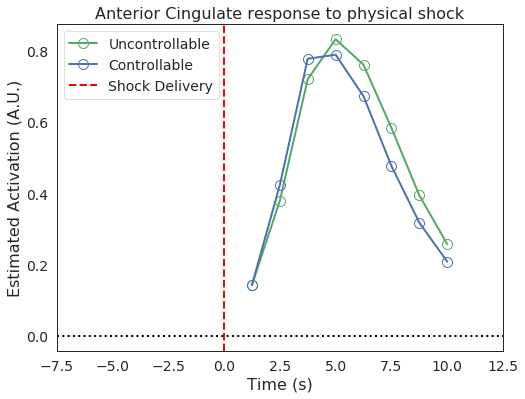

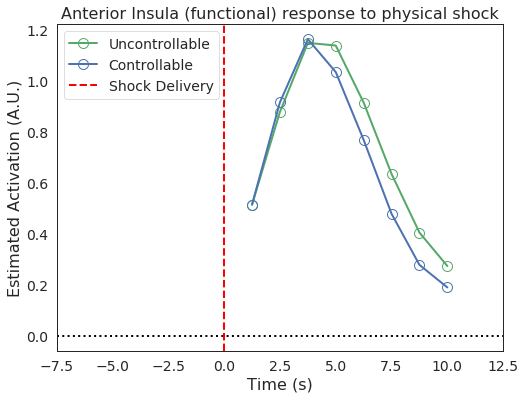

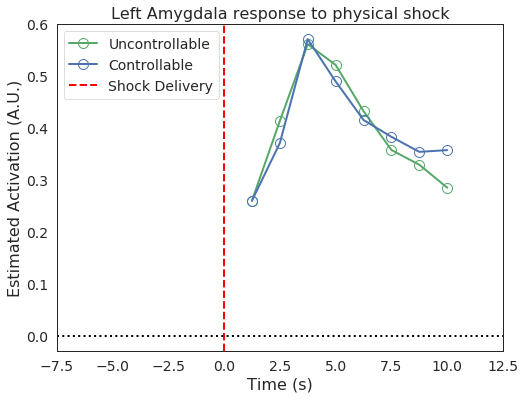

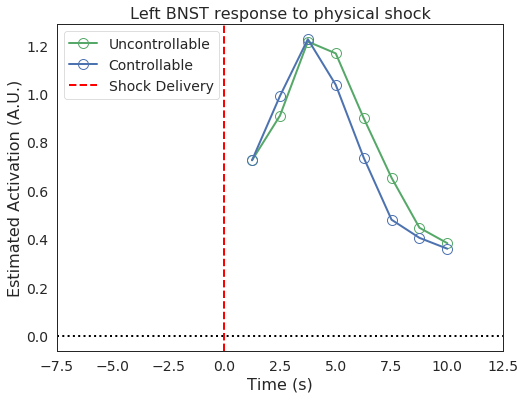

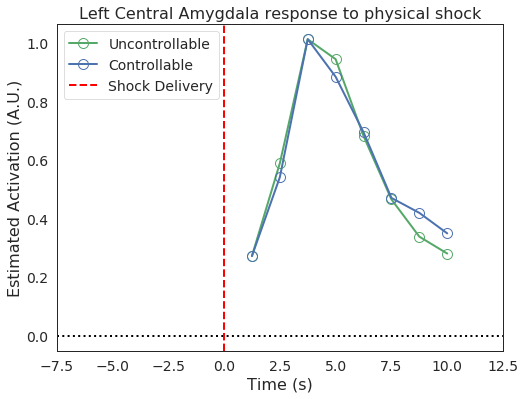

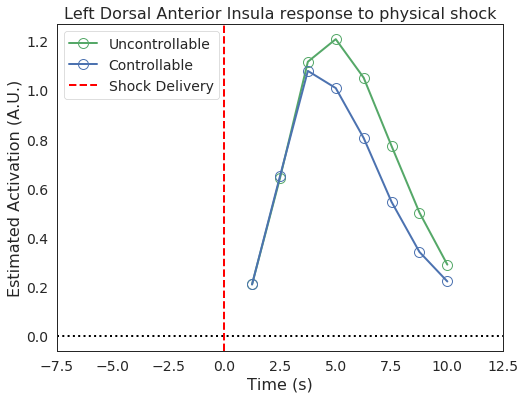

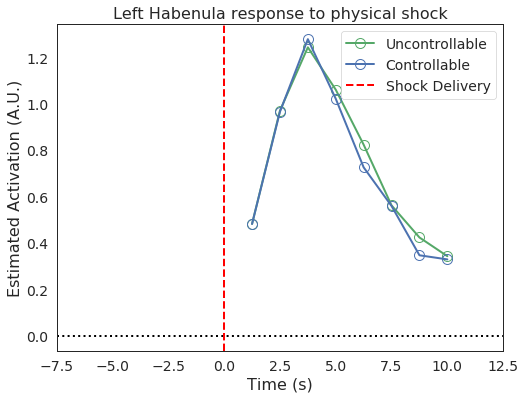

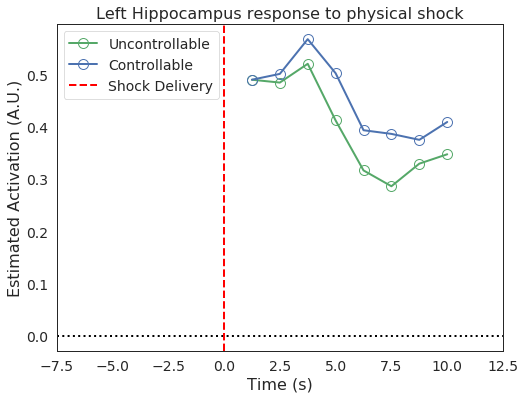

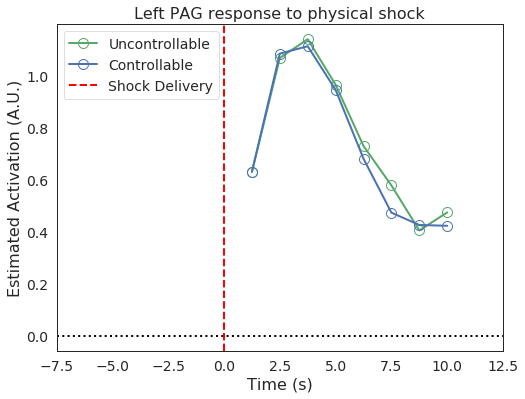

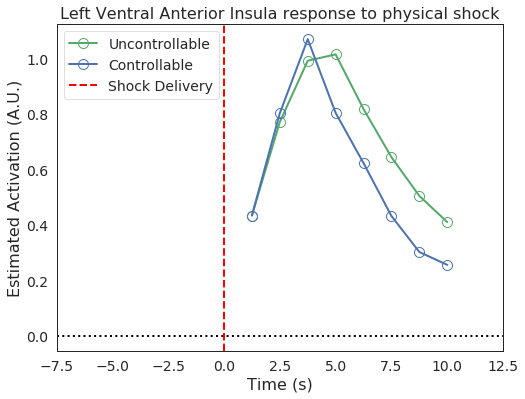

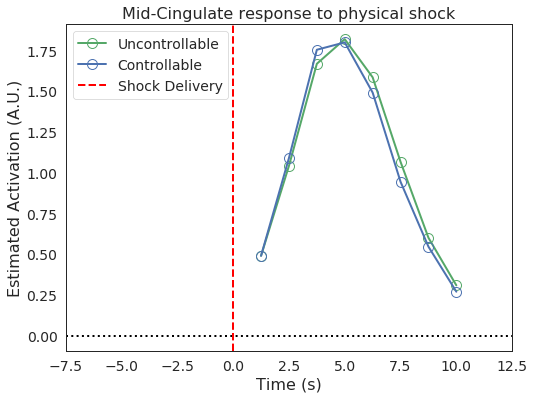

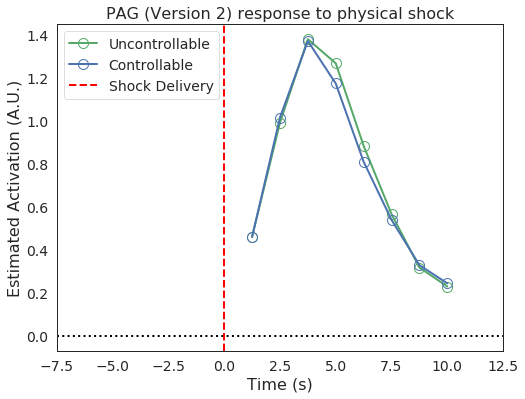

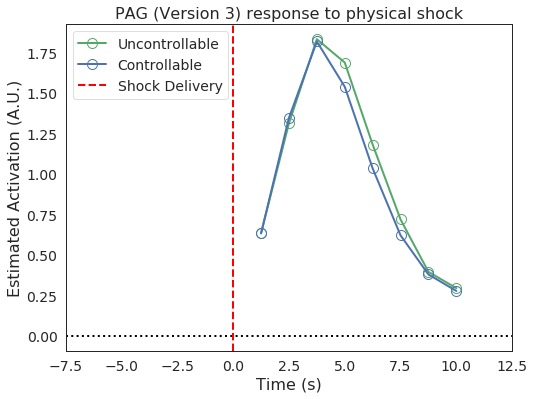

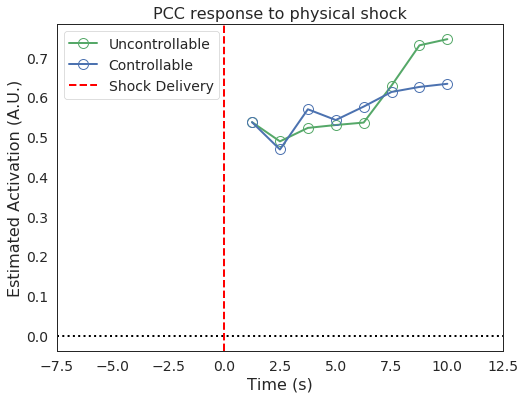

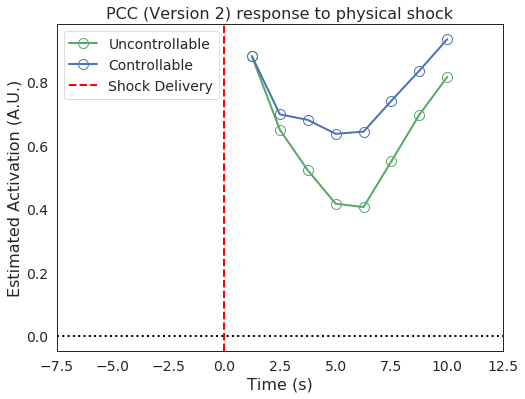

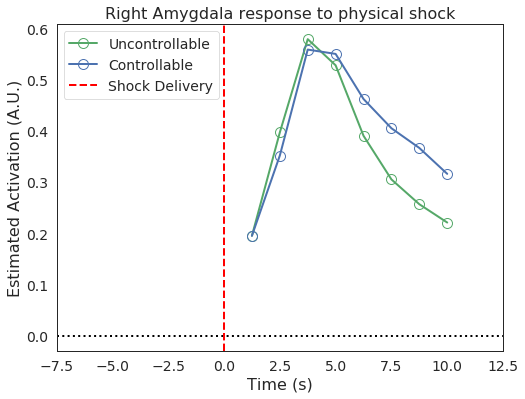

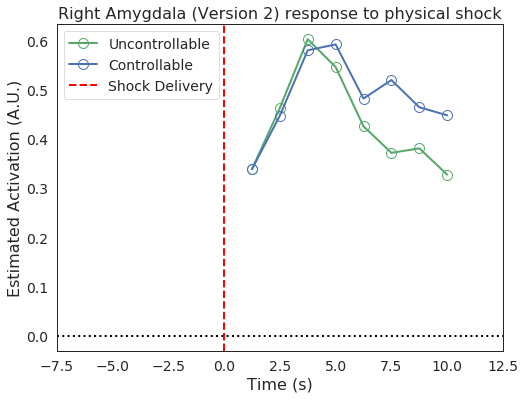

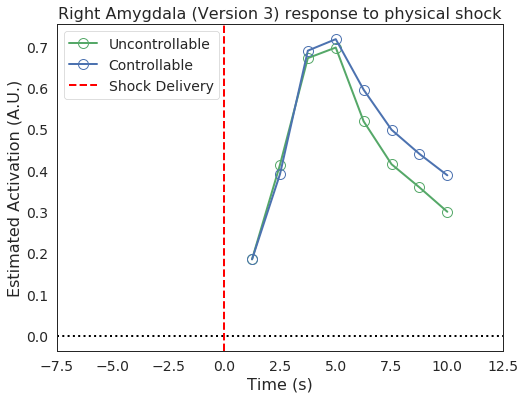

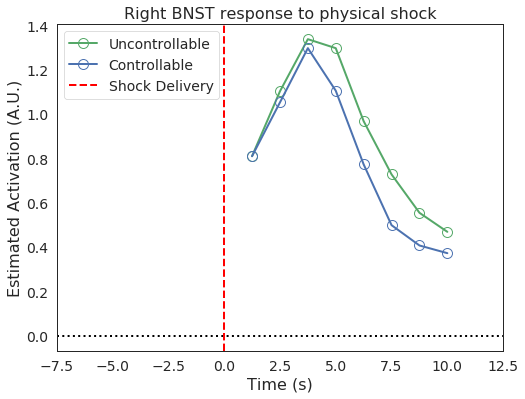

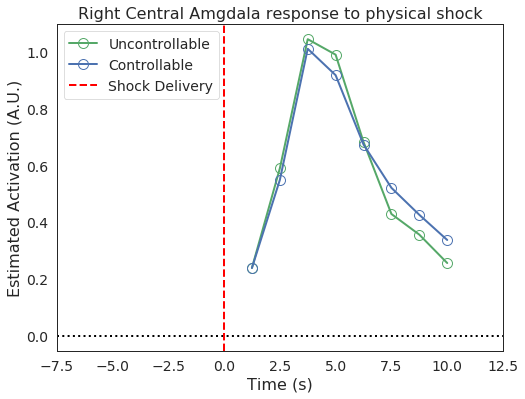

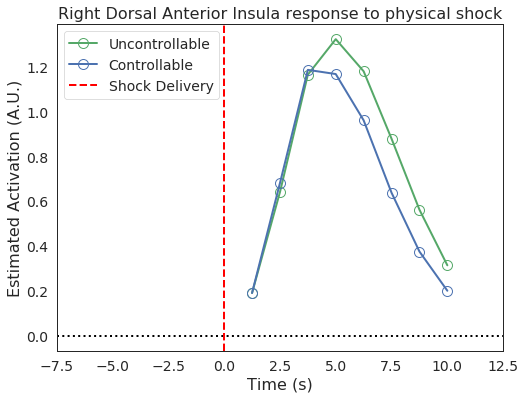

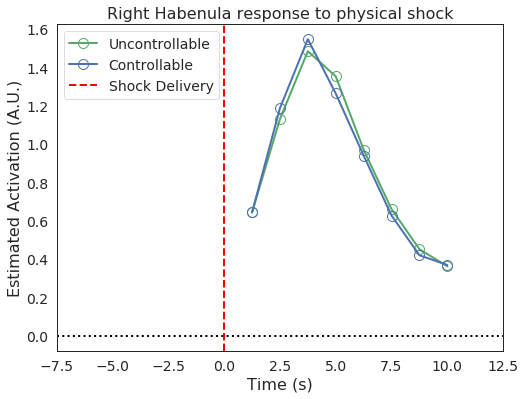

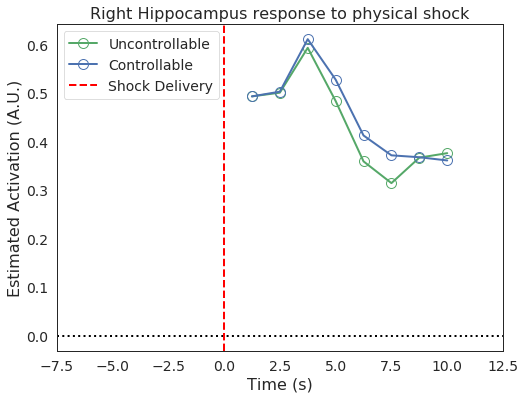

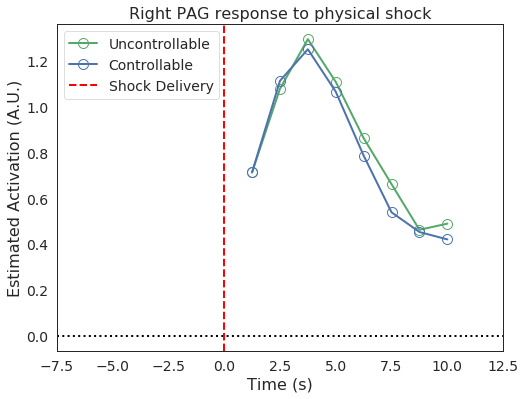

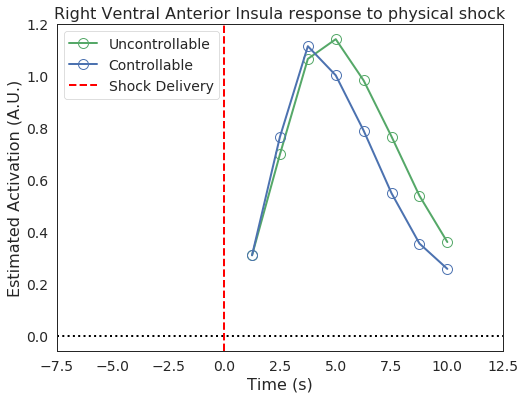

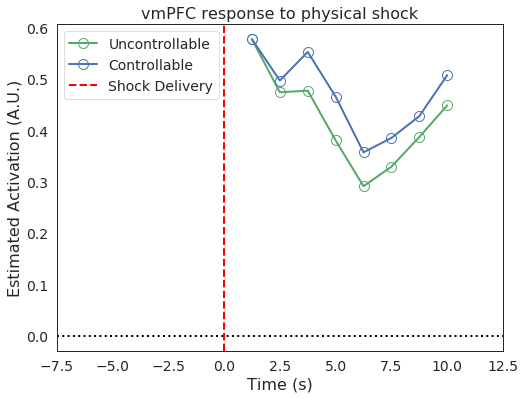

In [13]:
pal = sns.color_palette()
mypal = [pal[2],pal[0]]
for roi in sorted(ROIs):
    time = np.arange(1,9)*1.25
    
    uncon_resp = group_df['mean'][(group_df['Group'] == 'uncontrol') & (group_df['ROI'] == roi)].values
    con_resp = group_df['mean'][(group_df['Group'] == 'control') & (group_df['ROI'] == roi)].values
    
    plt.figure(figsize =(8,6))
    plt.plot(time,uncon_resp,linestyle='-',linewidth=2,marker='o',
             markersize=10,color=mypal[0],label='Uncontrollable',mfc = 'none')
    
    plt.plot(time,con_resp,linestyle='-',linewidth=2,marker='o',
             markersize=10,color=mypal[1],label='Controllable',mfc='none')
    plt.axhline(0,linestyle=':',color='black',linewidth = 2)
    plt.axvline(0,linestyle='--',color='red',linewidth = 2,label='Shock Delivery')
    plt.legend(fontsize=14)
    plt.xticks((np.arange(18)[::2]-6)*1.25)
    plt.tick_params(labelsize=14)
    plt.xlabel('Time (s)',fontdict=dict(size=16))
    plt.ylabel('Estimated Activation (A.U.)',fontdict=dict(size=16))
    plt.title('{} response to physical shock'.format(roi),fontdict=dict(size=16))
    plt.savefig('figures/{}_shock.png'.format(roi),dpi=300)

# Creating dataset for RBA

In [15]:
def getdataforRBA(paired_df,rois,filename):
    df_for_rba = paired_df[paired_df['TR'].isin(list(range(8,15)))].groupby(['ROI','Subject'])['Y'].agg([np.sum]).reset_index()
    df_for_rba.rename(columns={'sum':'Y'},inplace=True)
    df_for_rba[df_for_rba['ROI'].isin(rois)].replace({'ROI':roi_mapper}).to_csv(filename,sep='\t',float_format = '%.3f',index=False)
    print('Created ',filename)

In [17]:
rois = ['Right Ventral Anterior Insula','Right Dorsal Anterior Insula',
        'Left Dorsal Anterior Insula','Left Ventral Anterior Insula',
        'Right BNST','Left BNST','Anterior Cingulate',
        'Right Amygdala','Left Amygdala']
getdataforRBA(paired_df,rois,'../../dataset/data_for_RBA/uncon_v_con_shock.txt')

Created  ../../dataset/data_for_RBA/uncon_v_con_shock.txt


## Creating two datasets for RBA

    1) rAI, rdAI, BST, ACC
    2) vmPFC, PCC (version 2), hippocampus

In [16]:
datasets = {
            'TN':['Right Hippocampus','Left Hippocampus','PCC (Version 2)','vmPFC'],
            'TP':['Right Ventral Anterior Insula','Right Dorsal Anterior Insula',
                'Right BNST','Left BNST','Anterior Cingulate'],
            }

In [40]:
df_for_rba = paired_df[paired_df['TR'].isin(list(range(8,15)))].groupby(['ROI','Subject'])['Y'].agg([np.sum]).reset_index()
df_for_rba.rename(columns={'sum':'Y'},inplace=True)

In [41]:
df_for_rba[df_for_rba['ROI'].isin(datasets['TN'])].replace({'ROI':roi_mapper}).to_csv('../../dataset/data_for_RBA/uncon_v_con_shock_TNrois.txt',sep='\t',float_format = '%.3f',index=False)
df_for_rba[df_for_rba['ROI'].isin(datasets['TP'])].replace({'ROI':roi_mapper}).to_csv('../../dataset/data_for_RBA/uncon_v_con_shock_TProis.txt',sep='\t',float_format = '%.3f',index=False)

# Approach Window

In [11]:
approach_window_df = main_df[main_df['TR'].isin(list(range(2,8)))]

In [12]:
def preprocessApproach(approach_window_df):
    paired_df = pd.DataFrame(columns=['Subject','ROI','Y','TR','Time'])
    new_df = pd.DataFrame(columns=['Subject','Group','Pair','ROI','Time','TR','Response'])
    for pair in approach_window_df.Pair.unique():
        df = approach_window_df[approach_window_df['Pair']==pair]
        for roi in ROIs:
            uncon_resp = df['Response'][(df['Group'] == 'uncontrol') & (df['ROI'] == roi)].values
            con_resp = df['Response'][(df['Group'] == 'control') & (df['ROI'] == roi)].values

            con_df = pd.DataFrame([df[df['Group']=='control']['Time'].unique(), df[df['Group']=='control']['TR'].unique(), con_resp],
                                 index=['Time','TR','Response']).T
            con_df['Subject'] = df[df['Group']=='control']['Subject'].values[0]
            con_df['Group'] = 'control'
            con_df['Pair'] = pair
            con_df['ROI'] = roi

            uncon_df = pd.DataFrame([df[df['Group']=='uncontrol']['Time'].unique(), df[df['Group']=='uncontrol']['TR'].unique(), uncon_resp],
                                    index=['Time','TR','Response']).T
            uncon_df['Subject'] = df[df['Group']=='uncontrol']['Subject'].values[0]
            uncon_df['Group'] = 'uncontrol'
            uncon_df['Pair'] = pair
            uncon_df['ROI'] = roi


            new_df = pd.concat([new_df,uncon_df,con_df],axis=0)

            tmp = pd.DataFrame([uncon_resp-con_resp,df[df['Group']=='uncontrol']['Time'].unique(),
                               df[df['Group']=='uncontrol']['TR'].unique()],index=['Y','Time','TR']).T
            tmp['Subject'] = pair
            tmp['ROI'] = roi
            paired_df = pd.concat([paired_df,tmp],axis=0)
    return new_df, paired_df

In [13]:
new_df, paired_df = preprocessApproach(approach_window_df)

/home/climbach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/home/climbach/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [15]:
group_df = new_df.groupby(['Group','ROI','TR','Time'])['Response'].agg([np.mean,ste]).reset_index()
group_df.head()

,Group,ROI,TR,Time,mean,ste
0,control,Anterior Cingulate,2.0,-5.00,0.007219,0.013268
1,control,Anterior Cingulate,3.0,-3.75,0.018666,0.015764
2,control,Anterior Cingulate,4.0,-2.50,0.035424,0.015524
3,control,Anterior Cingulate,5.0,-1.25,0.074515,0.014004
4,control,Anterior Cingulate,6.0,0.00,0.073271,0.016928


## Creating only one dataset for RBA

    1) ACC, mid-cingulate, vmPFC, PCC, PCC (Version 2)

In [23]:
datasets = {'ROIs':['vmPFC','PCC','PCC (Version 2)','Mid-Cingulate','Anterior Cingulate']}

In [24]:
df_for_rba = paired_df.groupby(['ROI','Subject'])['Y'].agg([np.sum]).reset_index()
df_for_rba.rename(columns={'sum':'Y'},inplace=True)

In [25]:
df_for_rba[df_for_rba['ROI'].isin(datasets['ROIs'])].replace({'ROI':roi_mapper}).to_csv('../../dataset/data_for_RBA/uncon_v_con_appr.txt',sep='\t',float_format = '%.3f',index=False)